<a href="https://colab.research.google.com/github/janeaf/CarPrice/blob/main/CarPrice_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

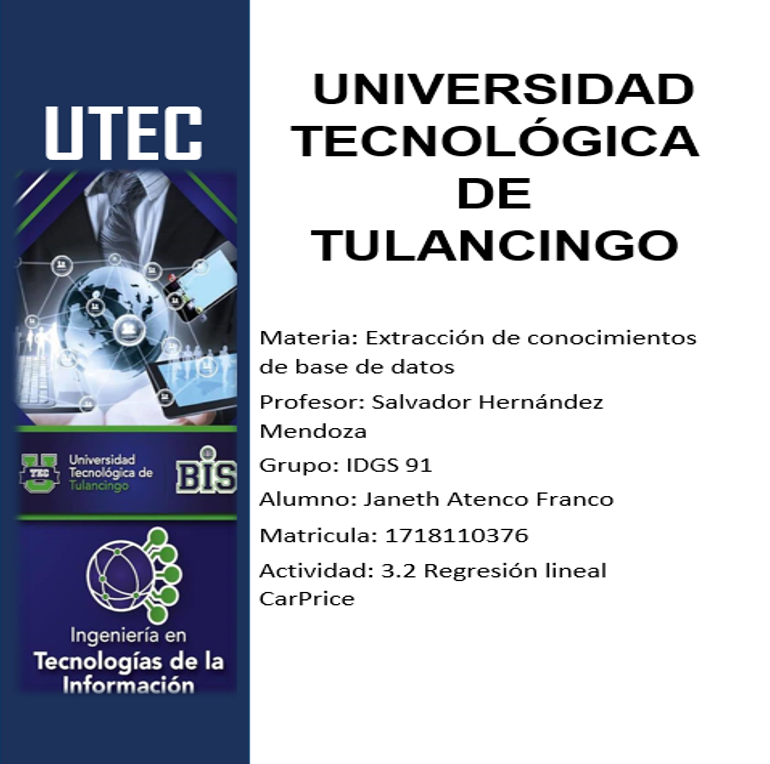

# **Parte 2**

## **Normalizar datos**

## **Librerias**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from joblib import dump,load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# **Cargamos el Dataset**

In [ ]:
datafra = pd.read_csv("car_price_assignment.csv")

In [ ]:
datafra.shape

(233, 26)

In [ ]:
datafra.head()

car_ID symboling                   CarName  ... citympg highwaympg  price
0      1         3        alfa-romero giulia  ...    21.0       27.0  13495
1      2         3       alfa-romero stelvio  ...    21.0       27.0  16500
2      3         1  alfa-romero Quadrifoglio  ...    19.0       26.0  16500
3      4         2               audi 100 ls  ...    24.0       30.0  13950
4      5         2                audi 100ls  ...    18.0       22.0  17450

[5 rows x 26 columns]

### **Informacion**

In [ ]:
datafra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            232 non-null    object 
 1   symboling         232 non-null    object 
 2   CarName           232 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

In [ ]:
datafra.isnull().sum()

car_ID               1
symboling            1
CarName              1
fueltype            28
aspiration          28
doornumber          28
carbody             28
drivewheel          28
enginelocation      28
wheelbase           28
carlength           28
carwidth            28
carheight           28
curbweight          28
enginetype          28
cylindernumber      28
enginesize          28
fuelsystem          28
boreratio           28
stroke              28
compressionratio    28
horsepower          28
peakrpm             28
citympg             28
highwaympg          28
price               28
dtype: int64

## **Separacion de las columnas por categoria**

In [ ]:
def categorical(datafra):
  categorical_col = []
  for col in datafra:
    if (datafra[col].dtype) == 'object':
      categorical_col.append(col)

  return categorical_col

In [ ]:
categorical_col = categorical(datafra)
print(categorical_col)

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'price']


### **Obtener columnas numericas**

In [ ]:
def numerical(datafra):
  numerical_col = []
  for col in datafra:
    if datafra[col].dtype != 'object':
      numerical_col.append(col)
  return numerical_col

In [ ]:
numerical_col = numerical(datafra)
print(numerical_col)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


# **Correcion datos inconsistentes**

In [ ]:
def uniqueData(df, col):

  lista_unica = df[col].unique()
  lista_unica.sort()
  
  print("\nColumna: ", col)
  print("Numero de columnas unicas: ", lista_unica.size)
  print("Unicos Valores: ", lista_unica)

In [ ]:
def correctionData(df, col):
  df[col] = df[col].str.lower()
  df[col] = df[col].str.strip()
  print("Corrección de datos ", col, " realizada!")

In [ ]:
for col in (categorical_col):
  correctionData(datafra, col)

Corrección de datos  car_ID  realizada!
Corrección de datos  symboling  realizada!
Corrección de datos  CarName  realizada!
Corrección de datos  fueltype  realizada!
Corrección de datos  aspiration  realizada!
Corrección de datos  doornumber  realizada!
Corrección de datos  carbody  realizada!
Corrección de datos  drivewheel  realizada!
Corrección de datos  enginelocation  realizada!
Corrección de datos  enginetype  realizada!
Corrección de datos  cylindernumber  realizada!
Corrección de datos  fuelsystem  realizada!
Corrección de datos  price  realizada!


## **Distribucion de datos categoricos**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

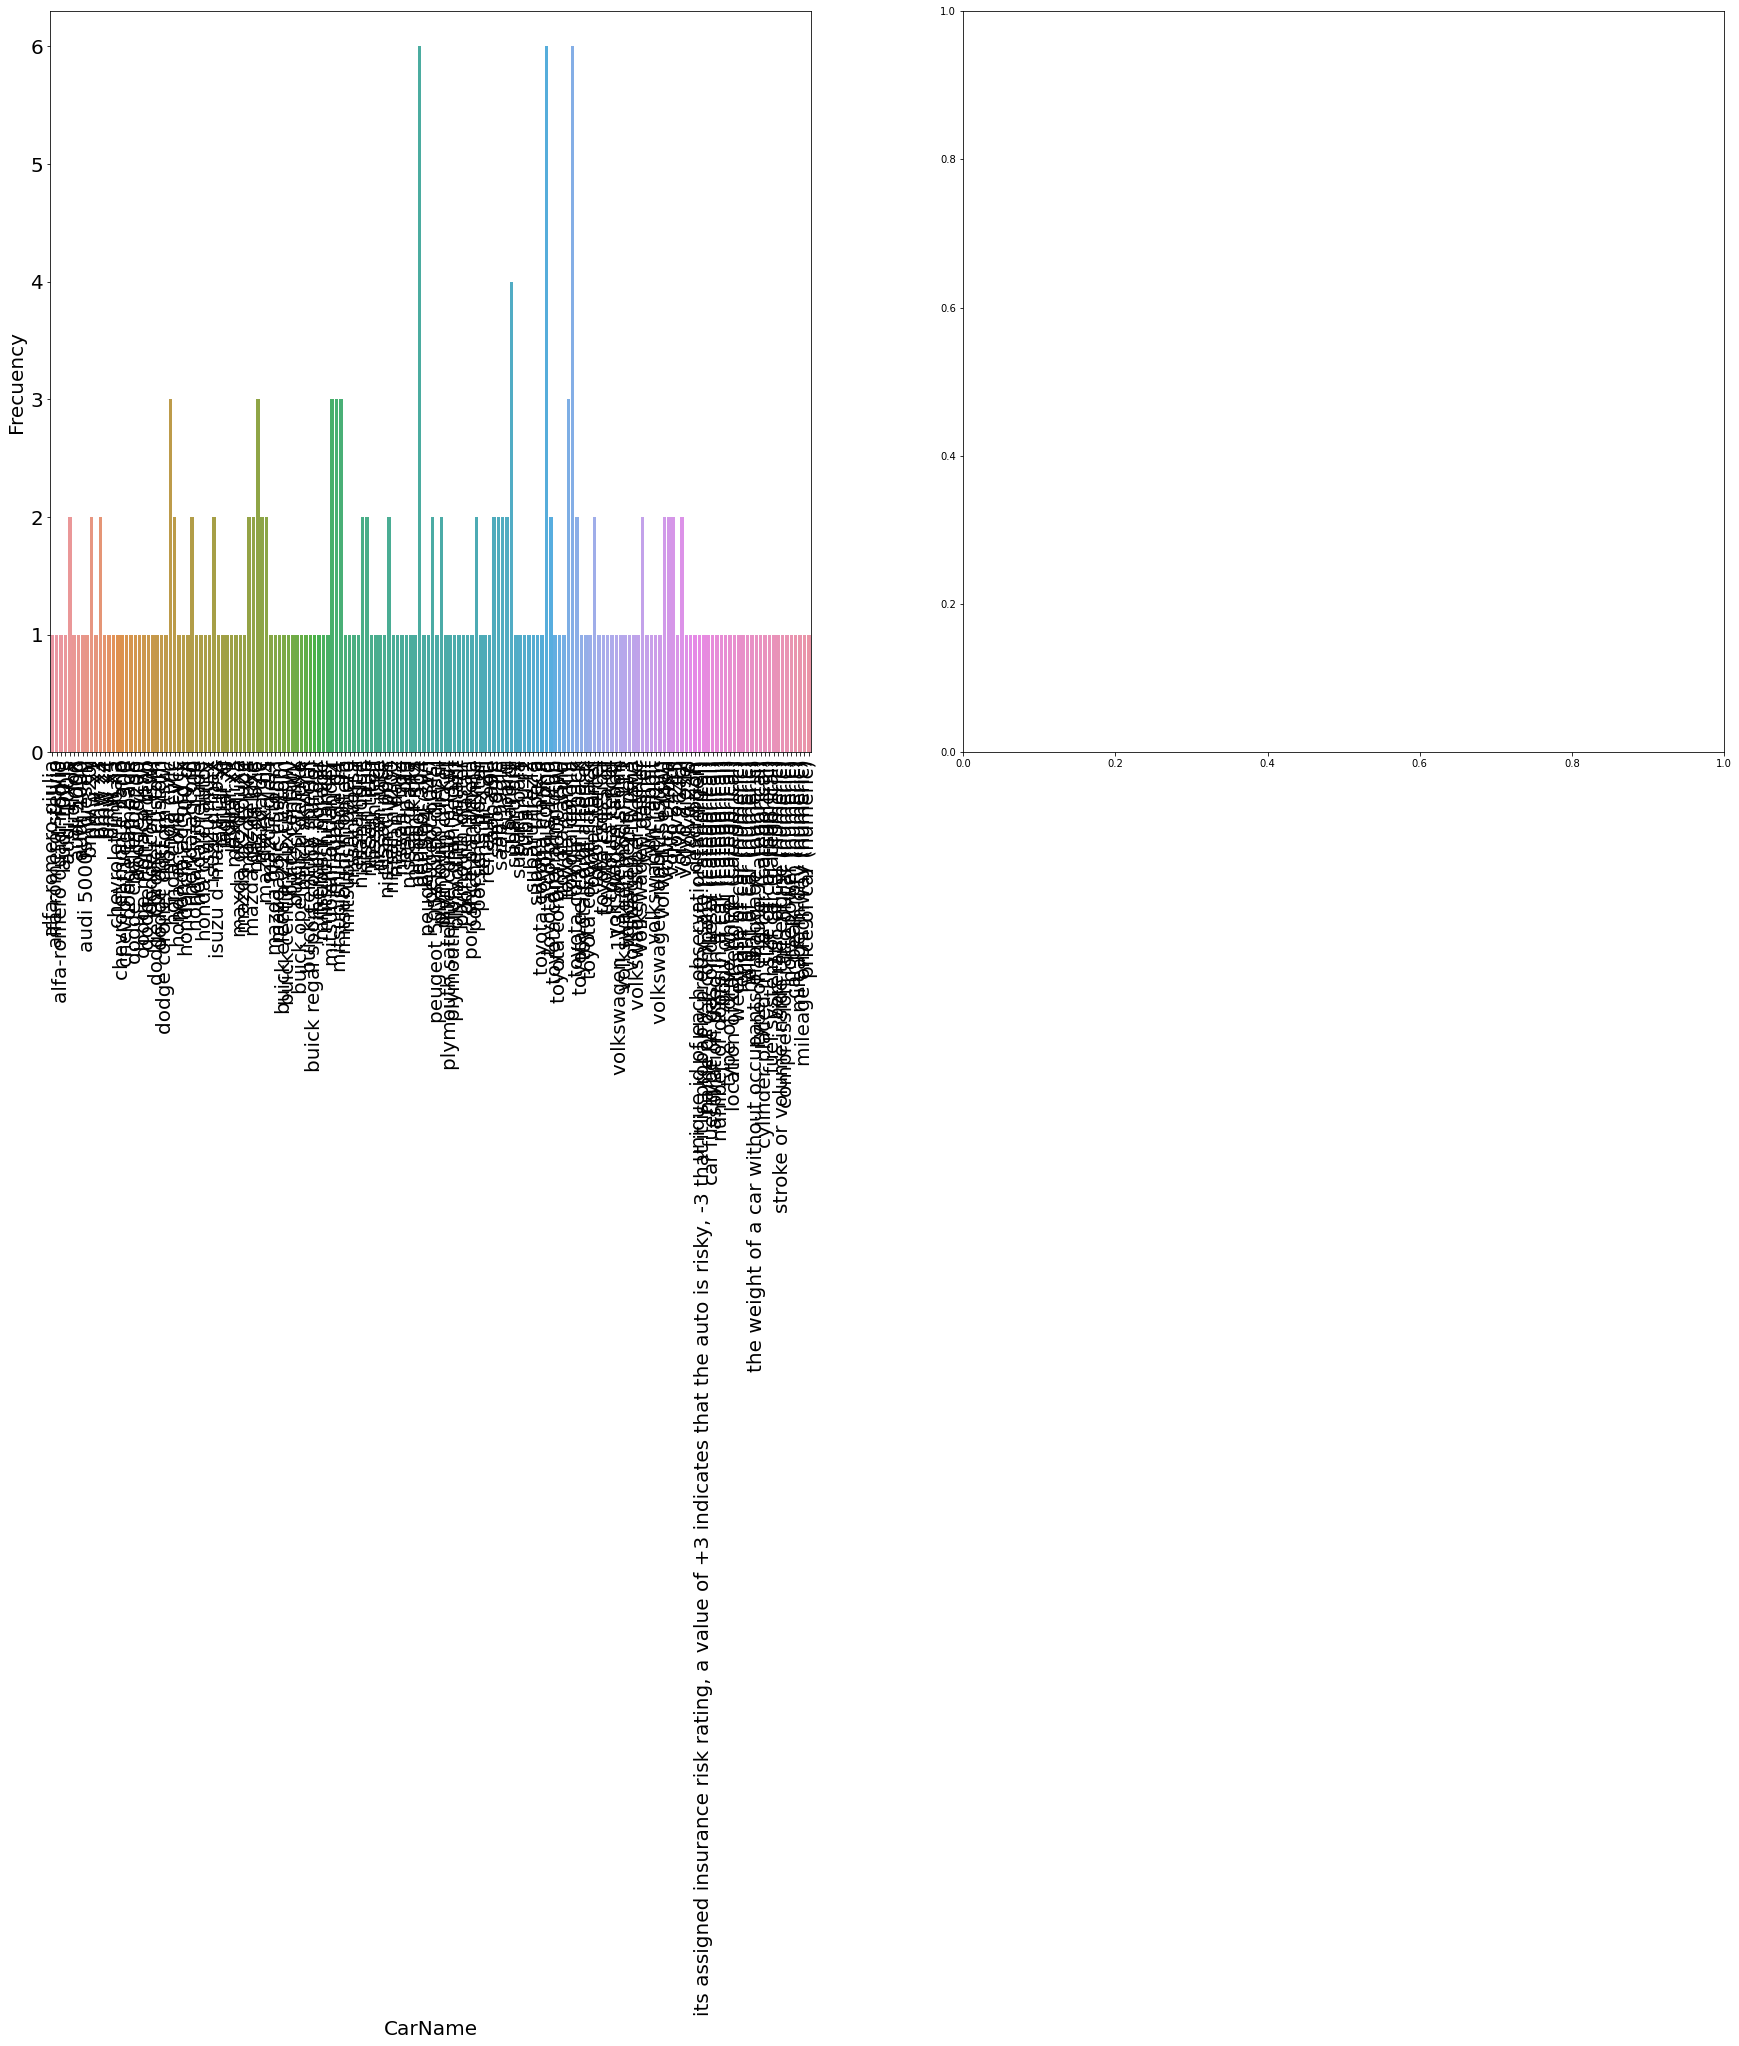

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
sns.countplot(datafra["CarName"])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.xlabel("CarName", fontsize=20, )
plt.ylabel("Frecuency", fontsize=20)
plt.subplot(2,2,2)
sns.boxplot(x=datafra["CarName"], y=datafra["price"])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.xlabel("CarName", fontsize=20, )
plt.ylabel("Price", fontsize=20)

Medidas Tendencia central

In [ ]:
numerical_col = numerical(datafra)
print(numerical_col)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


Describir el dataset

In [ ]:
datafra.describe()

wheelbase   carlength  ...  fuelsystem_spdi  fuelsystem_spfi
count  205.000000  205.000000  ...       233.000000       233.000000
mean    98.756585  174.049268  ...         0.038627         0.004292
std      6.021776   12.337289  ...         0.193118         0.065512
min     86.600000  141.100000  ...         0.000000         0.000000
25%     94.500000  166.300000  ...         0.000000         0.000000
50%     97.000000  173.200000  ...         0.000000         0.000000
75%    102.400000  183.100000  ...         0.000000         0.000000
max    120.900000  208.100000  ...         1.000000         1.000000

[8 rows x 35 columns]

In [ ]:
df_estadistica = pd.DataFrame(columns=numerical_col, index=["Minimo", "Media", "Mediana", "Moda", "Maximo"])
for name_col in numerical_col:
    var = datafra[name_col]
    df_estadistica.at["Media", name_col] = var.mean()
    df_estadistica.at["Mediana", name_col] = var.median()
    df_estadistica.at["Moda", name_col] = var.mode()[0]
    df_estadistica.at["Minimo", name_col] = var.min()
    df_estadistica.at["Maximo", name_col] = var.max()
df_estadistica

wheelbase carlength  ... fuelsystem_spdi fuelsystem_spfi
Minimo       86.6     141.1  ...               0               0
Media     98.7566   174.049  ...       0.0386266      0.00429185
Mediana        97     173.2  ...               0               0
Moda         94.5     157.3  ...               0               0
Maximo      120.9     208.1  ...               1               1

[5 rows x 35 columns]

In [ ]:
def graph_numeric(df, col):
  i=1
  plt.figure(figsize=(25,400))
  for j in col:
    #DISTPLOT
    plt.subplot(len(col),2,i)
    sns.distplot(df[j], kde=True)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.xlabel(j, fontsize=20, )
    plt.ylabel("Frecuency", fontsize=20)
    
    plt.axvline(x=df_estadistica[j]["Minimo"], color = 'gray', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Media"], color = 'green', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Moda"], color = 'red', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Mediana"], color = 'blue', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Maximo"], color = 'gray', linestyle='dashed', linewidth = 3)

    i=i+1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

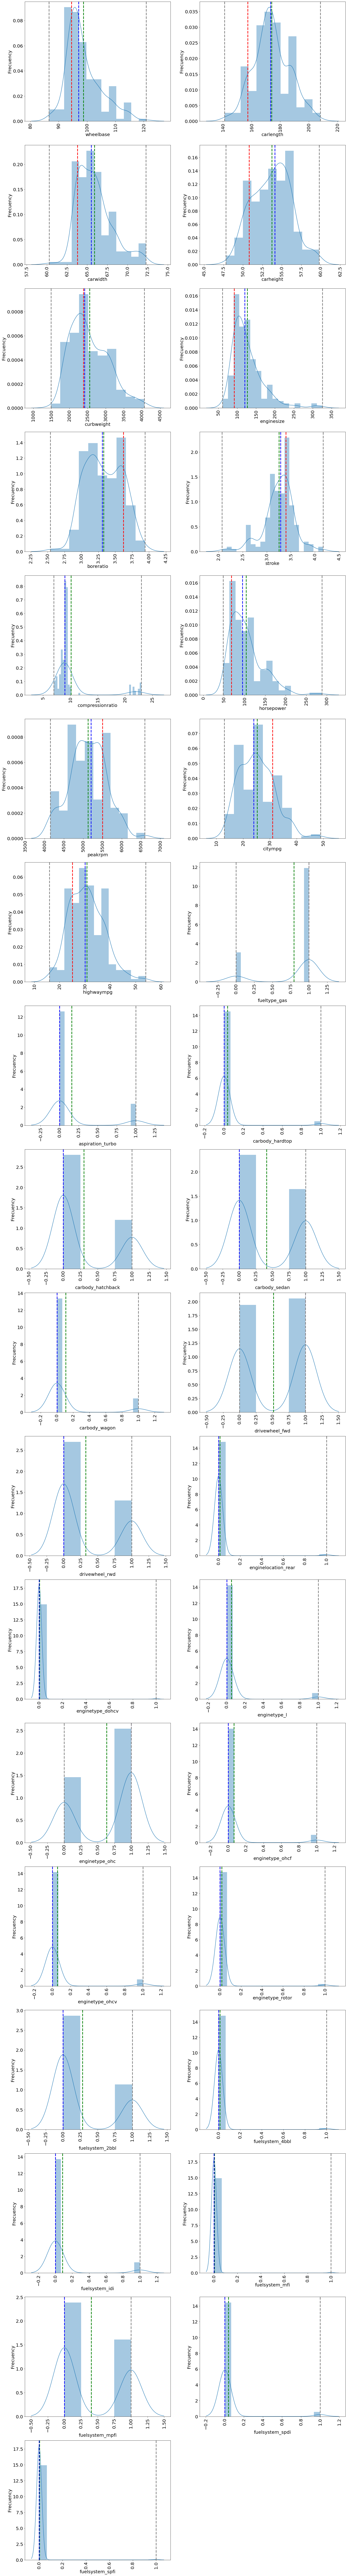

In [ ]:
graph_numeric(datafra, numerical_col)

Correlacion entre pares de columnas

In [ ]:
datafra.corr()

wheelbase  carlength  ...  fuelsystem_spdi  fuelsystem_spfi
wheelbase             1.000000   0.874587  ...        -0.117359        -0.032129
carlength             0.874587   1.000000  ...        -0.079790        -0.008245
carwidth              0.795144   0.841118  ...        -0.046399        -0.023158
carheight             0.589435   0.491029  ...        -0.278615        -0.066778
curbweight            0.776386   0.877728  ...        -0.002434         0.024052
enginesize            0.569329   0.683360  ...         0.004490        -0.013327
boreratio             0.488750   0.606454  ...        -0.004213         0.025977
stroke                0.160959   0.129533  ...         0.251259        -0.005688
compressionratio      0.249786   0.158414  ...        -0.153726        -0.016654
horsepower            0.353294   0.552623  ...         0.117664        -0.025056
peakrpm              -0.360469  -0.287242  ...         0.068748        -0.018411
citympg              -0.470414  -0.670909  ...        -0.123954        -0.013083
highwaympg           -0.544082  -0.704662  ...        -0.106615        -0.017848
fueltype_gas         -0.308346  -0.212679  ...         0.102101         0.033442
aspiration_turbo      0.257611   0.234539  ...         0.400406        -0.028525
carbody_hardtop      -0.008608   0.047292  ...        -0.037796        -0.012380
carbody_hatchback    -0.386094  -0.436269  ...         0.208711         0.100185
carbody_sedan         0.291086   0.269647  ...        -0.077293        -0.054958
carbody_wagon         0.210899   0.219683  ...        -0.069492        -0.022761
drivewheel_fwd       -0.460355  -0.508714  ...         0.149948        -0.067656
drivewheel_rwd        0.498830   0.538370  ...        -0.091955         0.094362
enginelocation_rear  -0.187790  -0.050989  ...        -0.022893        -0.007498
enginetype_dohcv     -0.004156   0.009391  ...        -0.013160        -0.004310
enginetype_l          0.399603   0.261715  ...        -0.046708        -0.015299
enginetype_ohc       -0.204037  -0.274413  ...         0.151906         0.049755
enginetype_ohcf      -0.183195  -0.118320  ...        -0.052579        -0.017222
enginetype_ohcv       0.166152   0.244053  ...        -0.048726        -0.015959
enginetype_rotor     -0.081174  -0.057877  ...        -0.026492        -0.008677
fuelsystem_2bbl      -0.396505  -0.487237  ...        -0.126012        -0.041273
fuelsystem_4bbl      -0.070124  -0.049998  ...        -0.022893        -0.007498
fuelsystem_idi        0.308346   0.212679  ...        -0.061422        -0.020118
fuelsystem_mfi       -0.033294  -0.004831  ...        -0.013160        -0.004310
fuelsystem_mpfi       0.348891   0.511374  ...        -0.164837        -0.053990
fuelsystem_spdi      -0.117359  -0.079790  ...         1.000000        -0.013160
fuelsystem_spfi      -0.032129  -0.008245  ...        -0.013160         1.000000

[35 rows x 35 columns]

## **Grafica correlacion HEATMAP**

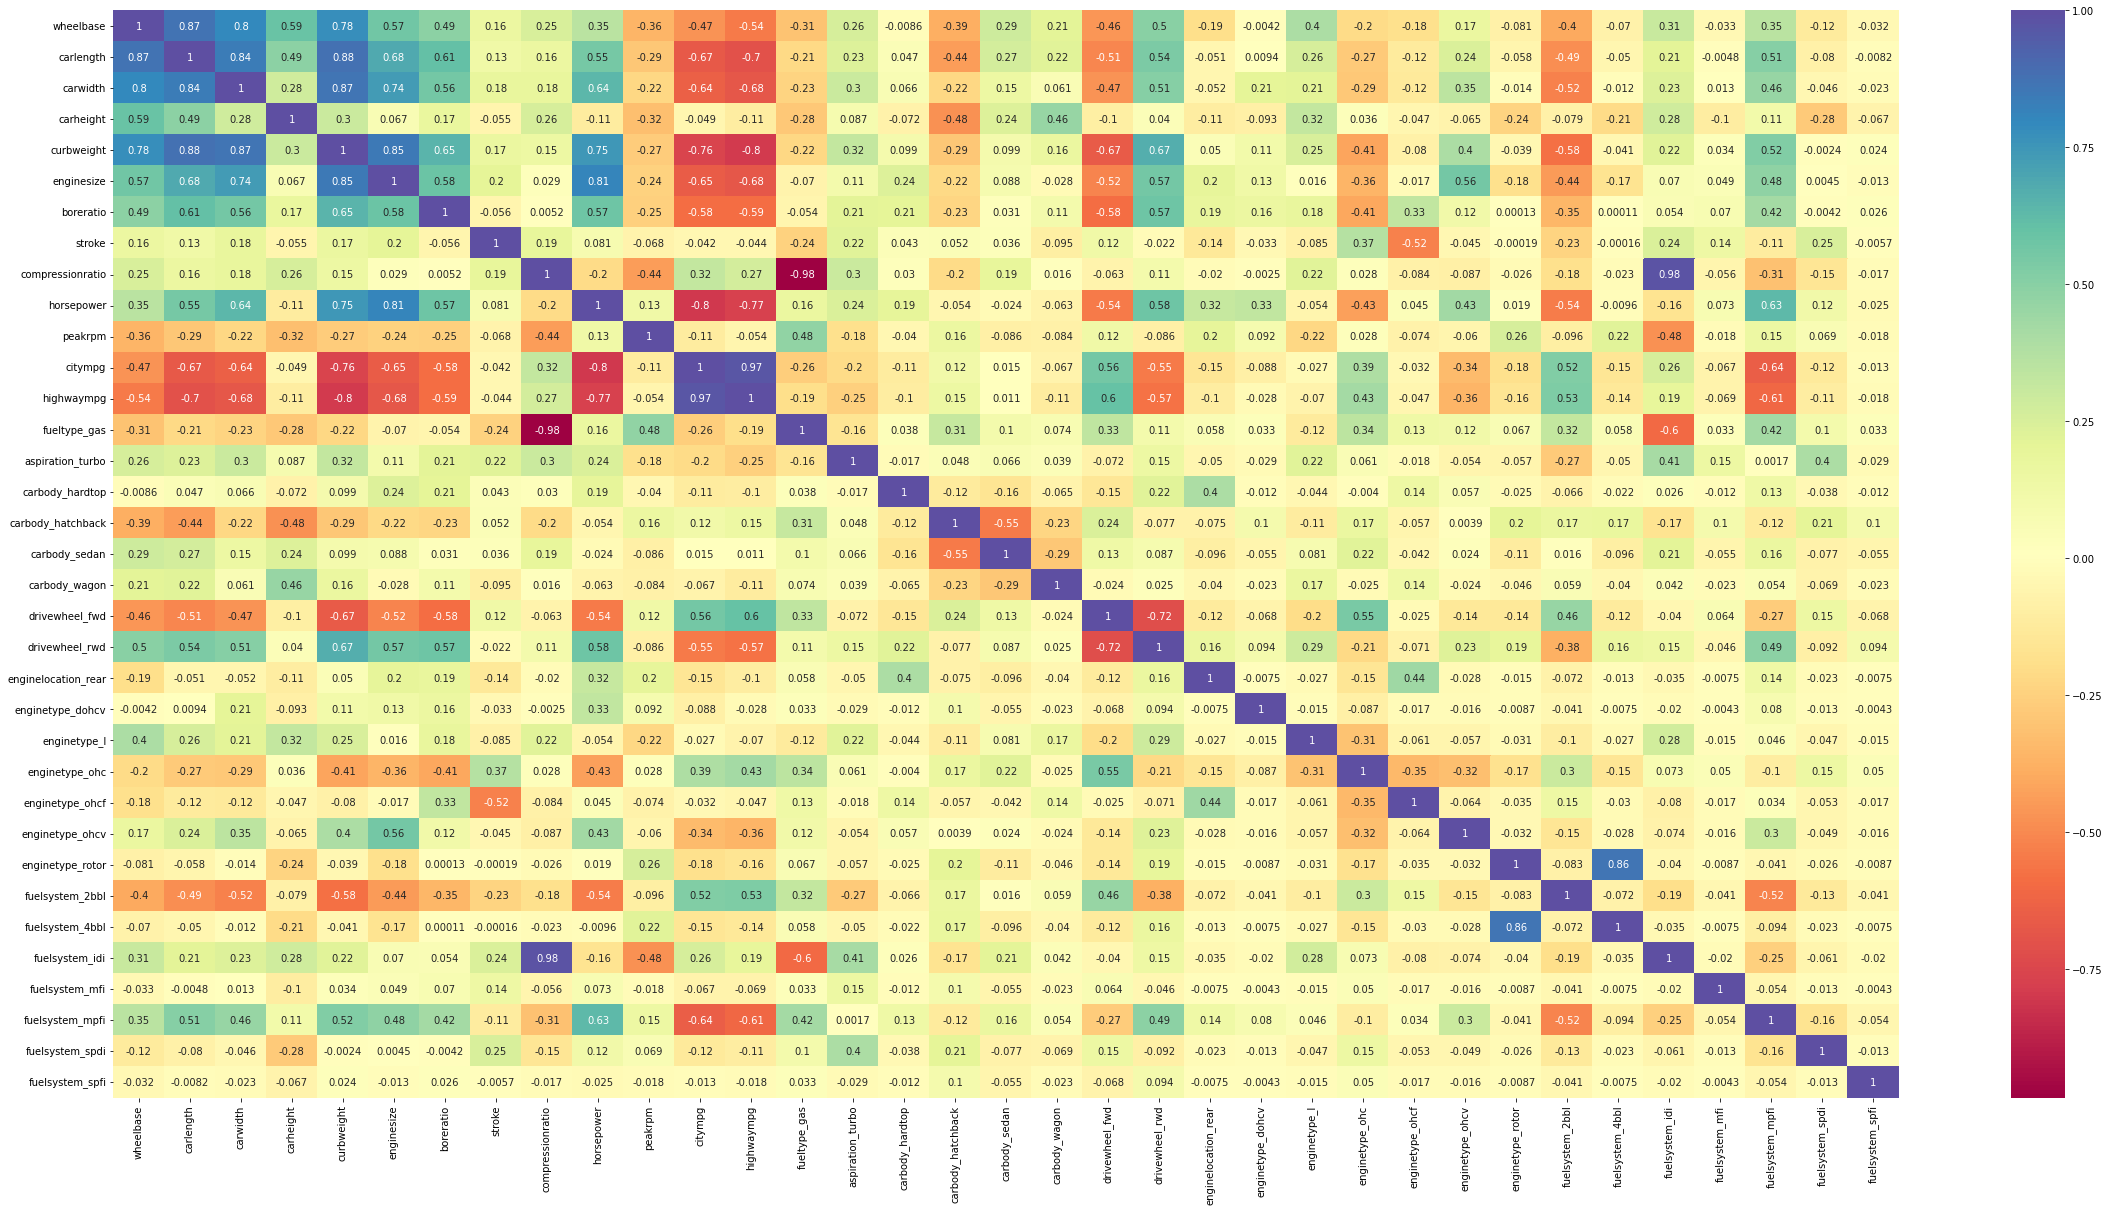

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(datafra.corr(), cmap="Spectral", annot=True)
plt.show()

In [ ]:
def correlation(datafra,threshold):
  cols_corr = set()
  corr_matrix = datafra.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        col_name = corr_matrix.columns[i]
        cols_corr.add(col_name)
  return cols_corr

In [ ]:
corr_cols = correlation(datafra.iloc[:,:-1],0.75)
corr_cols

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fueltype_gas',
 'highwaympg',
 'horsepower'}

In [ ]:
df_normalized = datafra.copy()
#Mostrar las primeras 5 filas
df_normalized.head()

car_ID symboling  ... fuelsystem_spdi fuelsystem_spfi
0      1         3  ...               0               0
1      2         3  ...               0               0
2      3         1  ...               0               0
3      4         2  ...               0               0
4      5         2  ...               0               0

[5 rows x 41 columns]

In [ ]:
def transf_minmax(df, col, df_transform):
  dataf=df[col]
  normalizar = ((dataf - dataf.min()) / (dataf.max() - dataf.min()))
  df_transform[col]=normalizar


In [ ]:
#Mostrar datos normalizados
def graph_normalized(df, col):
  i=1
  plt.figure(figsize=(25,400))
  for j in col:
    #DISTPLOT
    plt.subplot(len(col),2,i)
    sns.distplot(df[j], kde=True)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.xlabel(j, fontsize=20, )
    plt.ylabel("Frecuency", fontsize=20)

    i=i+1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

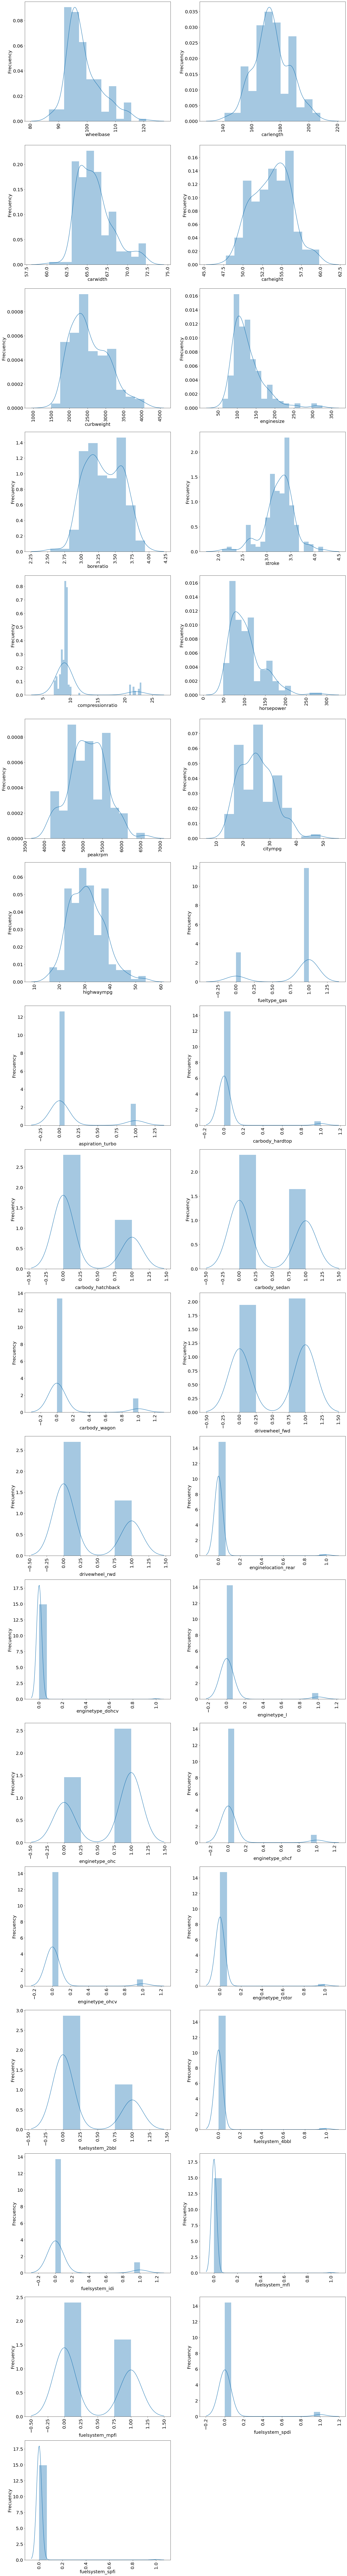

In [ ]:
graph_normalized(df_normalized, numerical_col)

In [ ]:
datafra.corr()

wheelbase  carlength  ...  fuelsystem_spdi  fuelsystem_spfi
wheelbase             1.000000   0.874587  ...        -0.117359        -0.032129
carlength             0.874587   1.000000  ...        -0.079790        -0.008245
carwidth              0.795144   0.841118  ...        -0.046399        -0.023158
carheight             0.589435   0.491029  ...        -0.278615        -0.066778
curbweight            0.776386   0.877728  ...        -0.002434         0.024052
enginesize            0.569329   0.683360  ...         0.004490        -0.013327
boreratio             0.488750   0.606454  ...        -0.004213         0.025977
stroke                0.160959   0.129533  ...         0.251259        -0.005688
compressionratio      0.249786   0.158414  ...        -0.153726        -0.016654
horsepower            0.353294   0.552623  ...         0.117664        -0.025056
peakrpm              -0.360469  -0.287242  ...         0.068748        -0.018411
citympg              -0.470414  -0.670909  ...        -0.123954        -0.013083
highwaympg           -0.544082  -0.704662  ...        -0.106615        -0.017848
fueltype_gas         -0.308346  -0.212679  ...         0.102101         0.033442
aspiration_turbo      0.257611   0.234539  ...         0.400406        -0.028525
carbody_hardtop      -0.008608   0.047292  ...        -0.037796        -0.012380
carbody_hatchback    -0.386094  -0.436269  ...         0.208711         0.100185
carbody_sedan         0.291086   0.269647  ...        -0.077293        -0.054958
carbody_wagon         0.210899   0.219683  ...        -0.069492        -0.022761
drivewheel_fwd       -0.460355  -0.508714  ...         0.149948        -0.067656
drivewheel_rwd        0.498830   0.538370  ...        -0.091955         0.094362
enginelocation_rear  -0.187790  -0.050989  ...        -0.022893        -0.007498
enginetype_dohcv     -0.004156   0.009391  ...        -0.013160        -0.004310
enginetype_l          0.399603   0.261715  ...        -0.046708        -0.015299
enginetype_ohc       -0.204037  -0.274413  ...         0.151906         0.049755
enginetype_ohcf      -0.183195  -0.118320  ...        -0.052579        -0.017222
enginetype_ohcv       0.166152   0.244053  ...        -0.048726        -0.015959
enginetype_rotor     -0.081174  -0.057877  ...        -0.026492        -0.008677
fuelsystem_2bbl      -0.396505  -0.487237  ...        -0.126012        -0.041273
fuelsystem_4bbl      -0.070124  -0.049998  ...        -0.022893        -0.007498
fuelsystem_idi        0.308346   0.212679  ...        -0.061422        -0.020118
fuelsystem_mfi       -0.033294  -0.004831  ...        -0.013160        -0.004310
fuelsystem_mpfi       0.348891   0.511374  ...        -0.164837        -0.053990
fuelsystem_spdi      -0.117359  -0.079790  ...         1.000000        -0.013160
fuelsystem_spfi      -0.032129  -0.008245  ...        -0.013160         1.000000

[35 rows x 35 columns]

# **Regresion lineal**
Dividir el dataframe en test y train

In [ ]:
predecir_col=[ "carlength",	"carwidth",	"carheight",	"curbweight",	"cylindernumber", "enginesize", "horsepower"]
X, Y = df_normalized[predecir_col], df_normalized['price']
print(X)
print(Y)

     carlength  carwidth  carheight  ...  cylindernumber enginesize  horsepower
0        168.8      64.1       48.8  ...            four      130.0       111.0
1        168.8      64.1       48.8  ...            four      130.0       111.0
2        171.2      65.5       52.4  ...             six      152.0       154.0
3        176.6      66.2       54.3  ...            four      109.0       102.0
4        176.6      66.4       54.3  ...            five      136.0       115.0
..         ...       ...        ...  ...             ...        ...         ...
228        NaN       NaN        NaN  ...             NaN        NaN         NaN
229        NaN       NaN        NaN  ...             NaN        NaN         NaN
230        NaN       NaN        NaN  ...             NaN        NaN         NaN
231        NaN       NaN        NaN  ...             NaN        NaN         NaN
232        NaN       NaN        NaN  ...             NaN        NaN         NaN

[233 rows x 7 columns]
0      13495
1  

In [ ]:
df_x = X
df_y = Y

TypeError: ignored

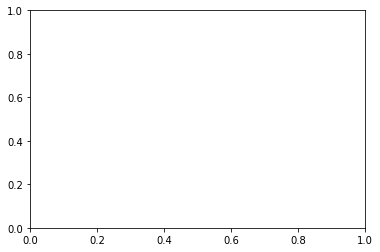

In [ ]:
plt.plot (df_x,df_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresion lineal")
#plt.savefig("rl.png")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=60)
x_train

carlength  carwidth  carheight  ...  cylindernumber enginesize  horsepower
114      198.9      68.4       58.7  ...            four      152.0        95.0
79       157.3      63.8       50.8  ...            four       98.0       102.0
209        NaN       NaN        NaN  ...             NaN        NaN         NaN
230        NaN       NaN        NaN  ...             NaN        NaN         NaN
187      171.7      65.5       55.7  ...            four       97.0        68.0
..         ...       ...        ...  ...             ...        ...         ...
143      172.0      65.4       52.5  ...            four      108.0        94.0
138      156.9      63.4       53.7  ...            four       97.0        69.0
70       202.6      71.7       56.3  ...            five      183.0       123.0
65       175.0      66.1       54.4  ...            four      140.0       120.0
205        NaN       NaN        NaN  ...             NaN        NaN         NaN

[163 rows x 7 columns]

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
print (model)

ValueError: ignored